# Base de dados de recomendações

#### Base consiste nas recomendações para evitar novas ocorrências

## Importando pacotes e bases de dados

In [44]:
#Importando pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [80]:
#verificando o tipo de encoding
import chardet
with open("recomendacao.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7285663015396125, 'language': ''}

In [81]:
#Importando a base de dados
df_recomendacao = pd.read_csv("recomendacao.csv", sep = ';', encoding='Windows-1252')
#Importando a base de dados
df_ocorrencia = pd.read_csv("ocorrencia_pos.csv", sep = ',')

## Visualização inicial da base e seus atributos

In [82]:
df_recomendacao

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,39115,095/2011,2011-07-21,2011-08-01,2015-12-21,Revisar os requisitos de experiência recente p...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,39115,096/2011,2011-07-21,2011-08-01,2011-09-16,Divulgar o presente relatório final aos operad...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,39156,063/2011,2011-06-30,2011-08-01,2011-09-12,Divulgar este Relatório aos operadores de aero...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3,39156,064/2011,2011-06-30,2011-08-01,2014-04-16,Acompanhar junto à autoridade primária de cert...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,39235,205/2011,2011-08-29,2011-09-29,2012-11-06,Realizar uma vistoria de segurança de voo na A...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
...,...,...,...,...,...,...,...,...,...
1507,78513,IG-023/CENIPA/2019 - 01,2019-10-28,NaN,NaN,"ATUAR JUNTO à AEROMAJ AVIAçãO AGRíCOLA LTDA., ...",AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1508,78513,IG-023/CENIPA/2019 - 02,2019-10-28,NaN,NaN,DIVULGAR OS ENSINAMENTOS COLHIDOS NO PRESENTE ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1509,78550,A-032/CENIPA/2019 - 01,2019-08-06,NaN,NaN,DIVULGAR OS ENSINAMENTOS COLHIDOS NA PRESENTE ...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1510,78609,A-046/CENIPA/2019 - 01,2019-12-18,NaN,NaN,ASSEGURAR QUE A FRISONFLY OFICINA DE MANUTENçã...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


In [83]:
#O código não será útil nas análises e será removido
df_recomendacao = df_recomendacao.drop(['recomendacao_numero'],axis=1)

In [84]:
#Verificando o número de diferentes recomendações da base
len(df_recomendacao['recomendacao_conteudo'].unique())

1442

In [85]:
#Identificação dos destinários 
df_recomendacao['recomendacao_destinatario_sigla'].unique()

array(['ANAC', 'SERIPA-6', 'BRASAG', 'ESCOLAS SAE-AG', 'SERIPA-5', 'ABAG',
       'APPA', 'DIVERSOS-J', 'SINDAG', 'PREF-CANUTAMA', 'AXIAL', 'FLEX',
       'GE CELMA', 'VARIG', 'MINAS TPR', 'DECEA', 'SERIPA-1', 'SERIPA-2',
       'SERIPA-3', 'SERIPA-4', 'SERIPA-7', 'ABRAPHE', 'PREF-UIRAMUTÃ',
       'AVIANCA', 'INFRAERO', 'JM', 'BRÁS FLIGHT', 'AEROC-PNA', 'FAA',
       'CEMAL', 'AEROSAFRA', 'IBAMA', 'PM-SC', 'NACIONAL ESC',
       'AEROC-BRG', 'AEROC-PTG', 'VILA VELHA', 'DPRF', 'CENIPA',
       'OCEANAIR-TPX', 'PIQUIATUBA', 'SANTOS DUMONT', 'STARCRAFT',
       'AEROC-SJC', 'AEROC-VRN', 'META OFC', 'BIRIGUI MAN', 'JOTAN',
       'TEMA', 'TASP', 'BSA', 'AEROC-GO', 'COPSERV', 'PLANAVE', 'ST-PI',
       'PASSAREDO', 'PRATT & WHITNEY', 'MOSTARDAS', 'RAMOS OFC',
       'GOIÁS OFC', 'MÔNACO', 'DAESP', 'DIVERSOS-AB', 'DTCEA-SV', 'TAM',
       'LET', 'GE AVIATION', 'NHT', 'NOAR', 'SOL', 'TEAM', 'EMBRAER',
       'SI-CE', 'LYCOMING', 'SSP-GO', 'CNP', 'SAC', 'ANP', 'DINACIA',
       'DIRSA', 'AERO

### Visualização da distribuição de alguns atributos

In [86]:
#agrupando por destinatário e identificando os 10 mais frequentes
destinatario = df_recomendacao.groupby(['recomendacao_destinatario_sigla']).count().sort_values('codigo_ocorrencia4',ascending=False)[:10].reset_index()

In [87]:
destinatario

,recomendacao_destinatario_sigla,codigo_ocorrencia4,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario
0,ANAC,1216,1216,932,865,1216,1216,1216
1,DECEA,39,39,31,23,39,39,39
2,PASSAREDO,14,14,14,14,14,14,14
3,LET,13,13,10,0,13,13,13
4,SINDAG,13,13,13,10,13,13,13
5,DIVERSOS-J,12,12,0,0,12,12,12
6,OCEANAIR-TPX,11,11,11,0,11,11,11
7,ANP,8,8,1,0,8,8,8
8,DPRF,7,7,7,0,7,7,7
9,AVIANCA,7,7,7,0,7,7,7


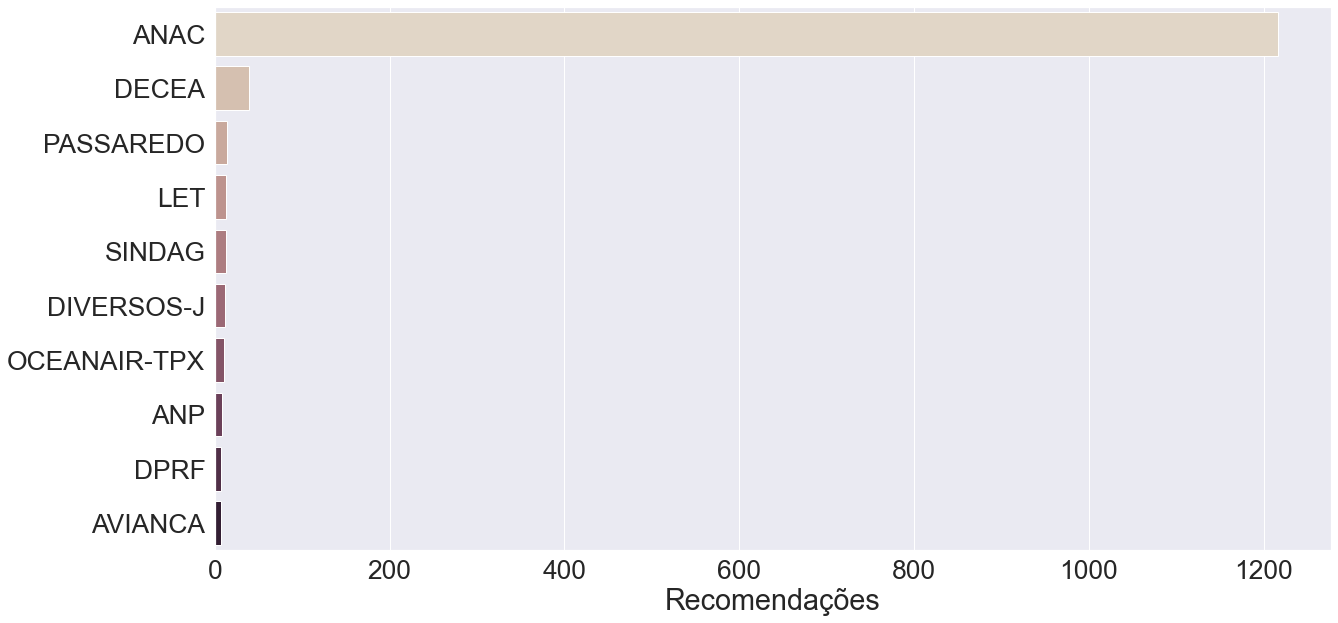

In [88]:
#Visualização da distribuição dos principais destinatários
sns.set(font_scale = 2.4)
sns_plot = sns.barplot(x="codigo_ocorrencia4", y="recomendacao_destinatario_sigla", data=destinatario, palette="ch:.25")
sns_plot.figure.set_size_inches(20, 10)
sns_plot.set_ylabel("")
sns_plot.set_xlabel("Recomendações")
sns_plot.figure.savefig("recomendacoes_destinatario.png", bbox_inches = 'tight')

In [89]:
#Identificando os status das recomendações
df_recomendacao['recomendacao_status'].unique()

array(['NÃO CUMPRIDA', 'CUMPRIDA', 'CUMPRIDA DE FORMA ALTERNATIVA',
       'AGUARDANDO RESPOSTA', '***'], dtype=object)

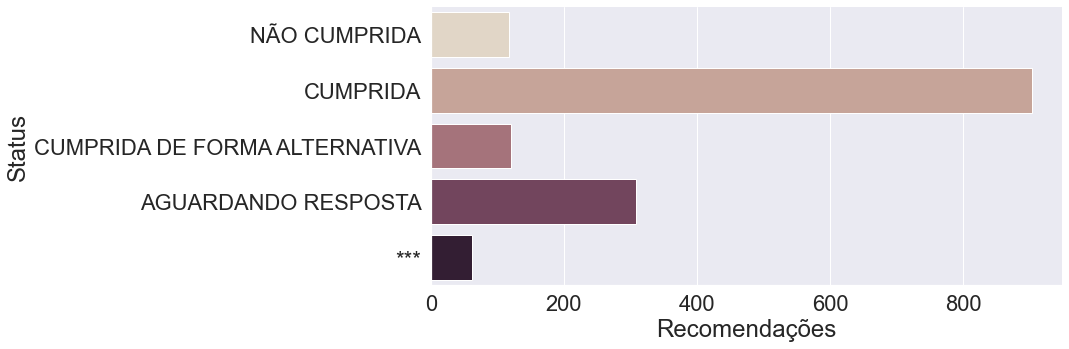

In [90]:
#Visualização da distribuição de status
sns.set(font_scale = 2)
sns_plot = sns.catplot(y='recomendacao_status', kind="count", palette="ch:.25", data=df_recomendacao, aspect=3)
sns_plot.set_axis_labels("Recomendações","Status")
sns_plot.savefig("recomendacao_status.png", bbox_inches = 'tight')

In [91]:
status = df_recomendacao.groupby(['recomendacao_status']).count().sort_values('codigo_ocorrencia4',ascending=False)[:10].reset_index()
#Apenas 60% das recomendações são cumpridas de forma integral
status.iloc[0][1]/len(df_recomendacao)

0.5978835978835979

### Análise de tempo médio para responder a uma recomendação 

In [92]:
#selecionando o dia da assinatura da recomendação e do feedback (excluindo valores faltantes)
dia_assinatura = df_recomendacao[np.logical_not(df_recomendacao['recomendacao_dia_feedback'].isna())]['recomendacao_dia_assinatura']
dia_feedback = df_recomendacao[np.logical_not(df_recomendacao['recomendacao_dia_feedback'].isna())]['recomendacao_dia_feedback']

In [93]:
#funções para transformar a data em um dia absoluto
#considerando o primeiro dia como 01/01/2010
def dias_absoluto(x):
    split = x.split('/')
    return (int(split[0])-1)+(int(split[1])-1)*30+(int(split[2])-2010)*365

def dias_absoluto_2(x):
    split = x.split('-')
    if split[0]!='0000':
        return (int(split[2])-1)+(int(split[1])-1)*30+(int(split[0])-2010)*365
    else:
        return np.nan

In [94]:
#aplicando as funções de transformação
dia_assinatura = dia_assinatura.apply(lambda x: dias_absoluto_2(x)).dropna()
dia_feedback = dia_feedback.apply(lambda x: dias_absoluto_2(x)).dropna()

In [95]:
#calculo do tempo para feedback com transformação de tempo em dia para meses
tempo_feedback = (dia_feedback - dia_assinatura).dropna()/30

In [96]:
#incluindo tempo na base de recomndações
df_recomendacao['tempo_feedback']=tempo_feedback

In [97]:
#Descrição dos tempos
df_recomendacao[np.logical_not(df_recomendacao['tempo_feedback'].isna())]['tempo_feedback'].describe()

count    893.000000
mean      13.430646
std       14.130869
min      -17.500000
25%        3.800000
50%        6.933333
75%       20.100000
max       77.300000
Name: tempo_feedback, dtype: float64

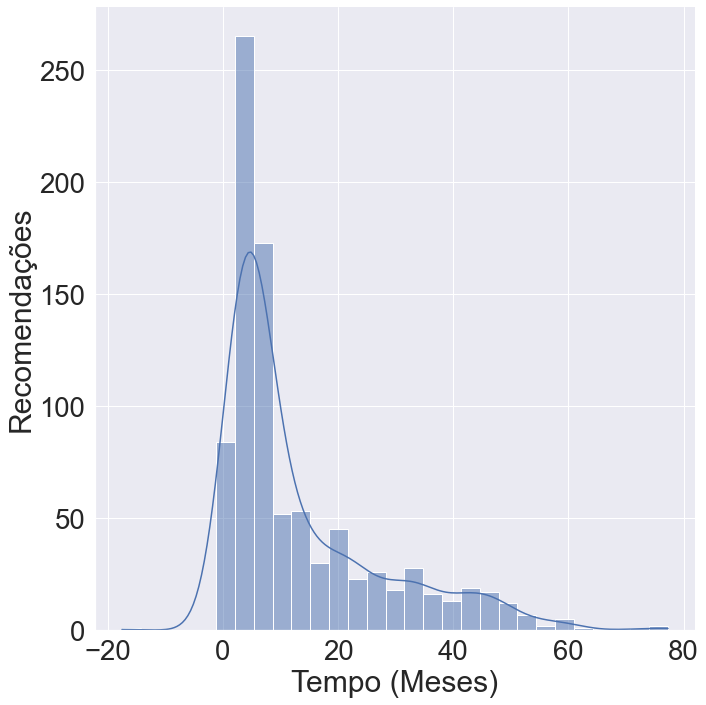

In [98]:
#Distribuição do tempo para feedback
sns.set(font_scale = 2.5)
sns_plot = sns.displot(data=df_recomendacao[np.logical_not(df_recomendacao['tempo_feedback'].isna())], x="tempo_feedback", kde=True, height=10.5, aspect=1.)
sns_plot.set_axis_labels("Tempo (Meses)", "Recomendações")
sns_plot.savefig("tempo_feedback.png")

## Análise para determinar o percentual de recomendações totalmente cumpridas

In [99]:
#agrupando recomendações com mesmo identificador
unique = df_recomendacao.drop_duplicates('codigo_ocorrencia4')

In [100]:
#inserindo lista com os status das recomendações recebidas por ocorrência
#inserindo o total de recomendações para cada ocorrência
dic = {}
for i,id in enumerate(unique['codigo_ocorrencia4']):
    dic[id]=i
recomendacao_status = ['']*len(unique)
total_recomendacoes = [0]*len(unique)

for data in df_recomendacao.iloc():
    total_recomendacoes[dic[data[0]]] += 1
    if recomendacao_status[dic[data[0]]] == '':
        recomendacao_status[dic[data[0]]]+=str(data[5])
    else:
        recomendacao_status[dic[data[0]]]+=','+str(data[5])
unique['recomendacao_status'] = recomendacao_status
unique['total_recomendacoes'] = total_recomendacoes

<ipython-input-100-e890e6a27657>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['recomendacao_status'] = recomendacao_status
<ipython-input-100-e890e6a27657>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['total_recomendacoes'] = total_recomendacoes


In [101]:
#Descrição do total de recomendações
unique['total_recomendacoes'].describe()

count    598.000000
mean       2.528428
std        2.409159
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       23.000000
Name: total_recomendacoes, dtype: float64

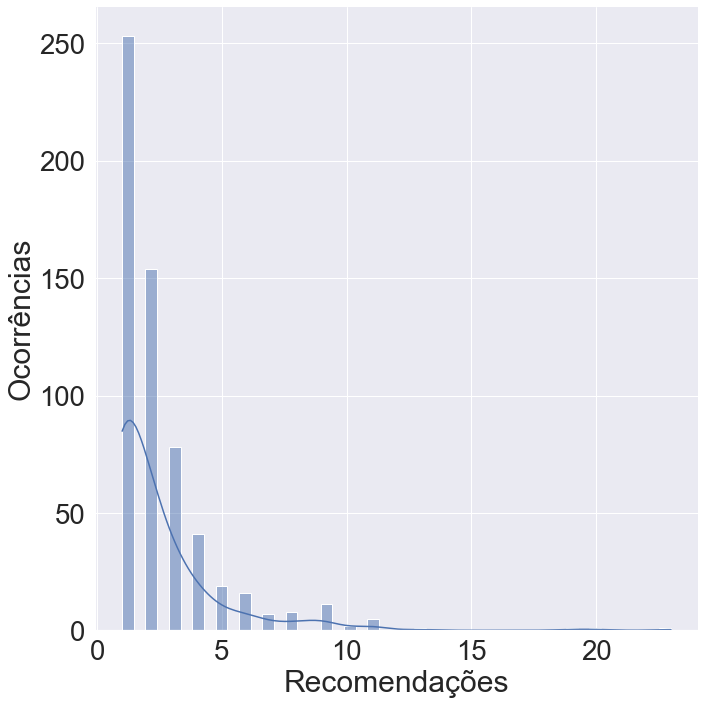

In [102]:
#Distribuição do total de recomendações
sns.set(font_scale = 2.5)
sns_plot = sns.displot(data=unique, x="total_recomendacoes", kde=True, height=10.5, aspect=1.)
sns_plot.set_axis_labels("Recomendações", "Ocorrências")
sns_plot.savefig("total_recomendacoes.png")

In [103]:
#criação de uma lista que indica se as recomendações foram totalmente cumpridas
recomendacao_status_resumo = []
for data in unique['recomendacao_status']:
    if 'CUMPRIDA' in data:
        if 'NÃO CUMPRIDA' in data:
            recomendacao_status_resumo.append('CUMPRIDA PARCIALMENTE')
        elif 'AGUARDANDO RESPOSTA' in data:
            recomendacao_status_resumo.append('CUMPRIDA PARCIALMENTE')
        elif '***' in data:
            recomendacao_status_resumo.append('CUMPRIDA PARCIALMENTE')
        elif '***' in data:
            recomendacao_status_resumo.append('CUMPRIDA PARCIALMENTE')
        elif '***' in data:
            recomendacao_status_resumo.append('CUMPRIDA DE FORMA ALTERNATIVA')
        else:
            recomendacao_status_resumo.append('TOTALMENTE CUMPRIDA')
    else:
        recomendacao_status_resumo.append('NÃO CUMPRIDA')

#inserção da lista como um novo atributo
unique['recomendacao_status_resumo']=recomendacao_status_resumo 

<ipython-input-103-d80b28859062>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['recomendacao_status_resumo']=recomendacao_status_resumo


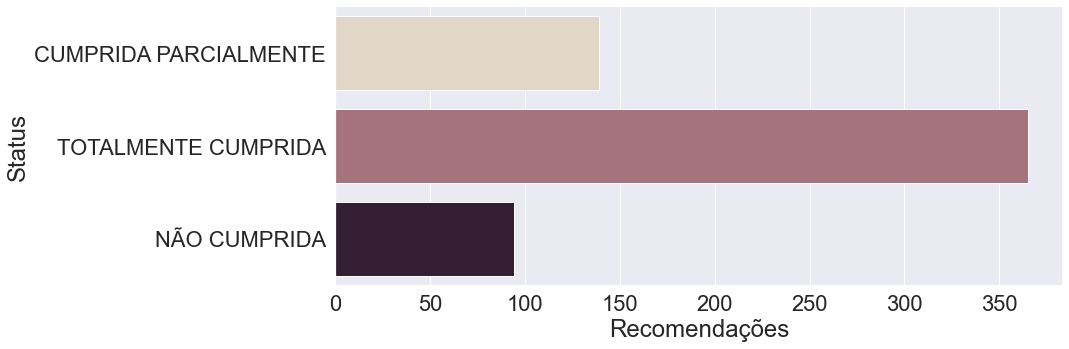

In [104]:
#Distribuição do status por ocorrência
sns.set(font_scale = 2)
sns_plot = sns.catplot(y='recomendacao_status_resumo', kind="count", palette="ch:.25", data=unique, aspect=3)
sns_plot.set_axis_labels("Recomendações","Status")
sns_plot.savefig("recomendacao_status_resumo.png")

## Análise de recomendações totalmente cumpridas ao longo dos anos

In [105]:
df_ocorrencia

,Unnamed: 0,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ano
0,0,39115,39115,39115,39115,39115,ACIDENTE,-13.3805555556,-44.6172222222,CORRENTINA,...,17:40:00,SIM,FINALIZADA,A-031/CENIPA/2011,SIM,2011-07-21,2,1,NÃO,2010
1,1,39155,39155,39155,39155,39155,INCIDENTE,NaN,NaN,BELO HORIZONTE,...,12:55:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2010
2,2,39156,39156,39156,39156,39156,INCIDENTE GRAVE,-15.2402777778,-59.3541666667,CASCAVEL,...,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,2011-06-30,2,1,NÃO,2010
3,3,39158,39158,39158,39158,39158,INCIDENTE,***,***,BELÉM,...,16:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2010
4,4,39176,39176,39176,39176,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,...,09:30:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,5240,79117,79117,79117,79117,79117,ACIDENTE,-10.94361,-69.57167,ASSIS BRASIL,...,15:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2019
5241,5241,79119,79119,79119,79119,79119,ACIDENTE,-13.78361,-57.03250,SÃO JOSÉ DO RIO CLARO,...,10:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2019
5242,5242,79123,79123,79123,79123,79123,ACIDENTE,-25.42972,-48.71167,ANTONINA,...,18:30:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2019
5243,5243,79203,79203,79203,79203,79203,INCIDENTE,-27.670278,-48.552500,FLORIANÓPOLIS,...,16:37:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2019


In [106]:
#Unindo a tabela de ocorrencias com a de recomendações
df_ocorrencia_recomendacao = df_ocorrencia.merge(unique)

In [107]:
#Visualização das colunas
df_ocorrencia_recomendacao.columns

Index(['Unnamed: 0', 'codigo_ocorrencia', 'codigo_ocorrencia1',
       'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4',
       'ocorrencia_classificacao', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf',
       'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia',
       'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'ano', 'recomendacao_dia_assinatura',
       'recomendacao_dia_encaminhamento', 'recomendacao_dia_feedback',
       'recomendacao_conteudo', 'recomendacao_status',
       'recomendacao_destinatario_sigla', 'recomendacao_destinatario',
       'tempo_feedback', 'recomendacao_status_resumo'],
      dtype='object')

In [108]:
#Transformação de data para ano
datas = df_ocorrencia_recomendacao['ocorrencia_dia'].astype("datetime64")
df_ocorrencia_recomendacao['ano']=datas.dt.year

In [109]:
#Criação de atributos que indicam o status a partir de 0 ou 1
df_ocorrencia_recomendacao['total_cumprida'] = df_ocorrencia_recomendacao['recomendacao_status_resumo'].apply(lambda x: 1 if x == 'TOTALMENTE CUMPRIDA' else 0)
df_ocorrencia_recomendacao['parcial_cumprida'] = df_ocorrencia_recomendacao['recomendacao_status_resumo'].apply(lambda x: 1 if x == 'CUMPRIDA PARCIALMENTE' else 0)
df_ocorrencia_recomendacao['nao_cumprida'] = df_ocorrencia_recomendacao['recomendacao_status_resumo'].apply(lambda x: 1 if x == 'NÃO CUMPRIDA' else 0)

In [110]:
#agrupando por ano, considerando soma e contagem
ocorrencias = df_ocorrencia_recomendacao.groupby(['ano']).count().reset_index()
df_anos = df_ocorrencia_recomendacao.groupby(['ano']).sum().reset_index()

In [111]:
#calculando o percentual de recomendações totalmente cumpridas
df_anos['p_total_cumprida']=df_anos['total_cumprida']/ocorrencias['codigo_ocorrencia']

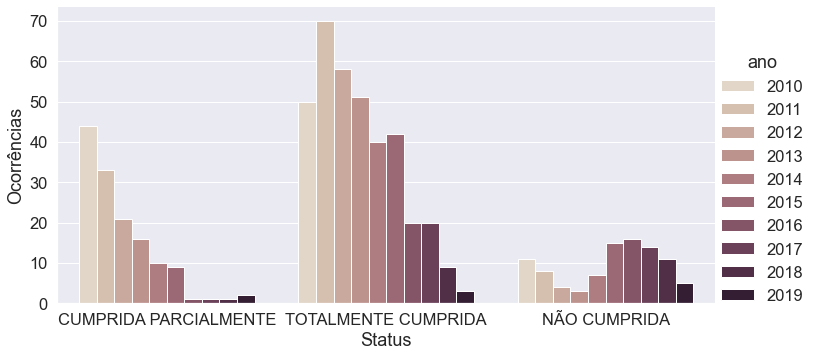

In [116]:
#Distribuição de status em função dos anos
sns.set(font_scale = 1.5)
sns_plot = sns.catplot(x='recomendacao_status_resumo', hue="ano", kind="count", palette="ch:.25", data=df_ocorrencia_recomendacao, aspect=2)
sns_plot.set_axis_labels("Status","Ocorrências")
sns_plot.savefig("status_resumo_tempo_1.png")

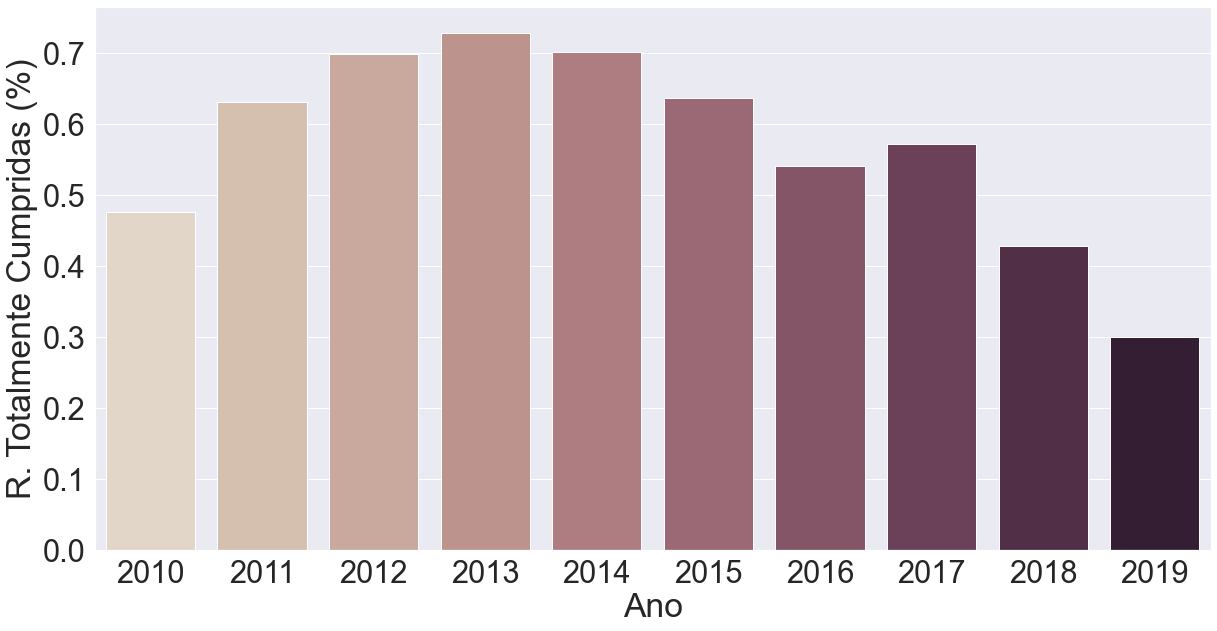

In [118]:
#Distribuição do percentual de recomendações totalmente cumpridas
sns.set(font_scale = 2.8)
sns_plot = sns.barplot(x='ano', y="p_total_cumprida", data=df_anos, palette="ch:.25")
sns_plot.figure.set_size_inches(20, 10)
sns_plot.set_xlabel("Ano")
sns_plot.set_ylabel("R. Totalmente Cumpridas (%)")
sns_plot.figure.savefig("p_total_cumprida_tempo.png")